In [1]:
import pandas as pd
import numpy as np


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle, Arc
sns.set(style="white")
%matplotlib inline

In [42]:
data_path = '/Users/pvithayathil/homebound/kaggle-competitions/kobe-bryant-shot-selection/data/processed/'


In [43]:
df_train=pd.read_csv(data_path+'/train.csv')

In [44]:
df_train_target=pd.read_csv(data_path+'/train_target.csv')

In [45]:
df_train['shot_made_flag'] = df_train_target['shot_made_flag']

In [46]:
df_train.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,seconds_from_period_end,shot_is_in_possibly_clutch_moment,num_shots_taken_in_game,num_shots_made_in_game,num_points_made_in_game,num_shots_made_in_last_five_attempts,is_home_game,game_is_back_to_back,num_game_last_7_days,shot_made_flag
0,Driving Dunk Shot,Dunk,75,20000230,34.0443,0,0,-118.2698,4,1,...,244,0,5,2.0,4.0,2.0,1,1,3,1.0
1,Jump Shot,Jump Shot,100,40200221,33.8603,-48,184,-118.3178,0,1,...,47,0,4,2.0,4.0,2.0,0,0,2,0.0
2,Jump Shot,Jump Shot,358,40000051,33.9743,-23,70,-118.2928,0,3,...,41,0,16,9.0,19.0,2.0,0,0,2,0.0
3,Running Jump Shot,Jump Shot,24,29800629,34.0283,-72,16,-118.3418,8,1,...,515,0,2,1.0,2.0,1.0,0,0,3,1.0
4,Jump Shot,Jump Shot,379,29900729,33.9873,-38,57,-118.3078,5,4,...,302,1,7,3.0,6.0,2.0,0,0,2,0.0


In [57]:
df_train['made_over_25_points_in_shots'] = np.select([df_train['num_points_made_in_game'] >= 25], 
                                                     [1],
                                                     default=0)
                                                     
                                                     

In [62]:
df_train.groupby(['made_over_25_points_in_shots'])['game_id'].count().reset_index().head()

,made_over_25_points_in_shots,game_id
0,0,19987
1,1,570


In [64]:
df_train.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_type',
       'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'team_id',
       'team_name', 'game_date', 'matchup', 'opponent', 'shot_id',
       'shot_point_value', 'is_two_point', 'is_three_point', 'is_shot',
       'seconds_from_period_end', 'shot_is_in_possibly_clutch_moment',
       'num_shots_taken_in_game', 'num_shots_made_in_game',
       'num_points_made_in_game', 'num_shots_made_in_last_five_attempts',
       'is_home_game', 'game_is_back_to_back', 'num_game_last_7_days',
       'shot_made_flag', 'season2', 'made_over_25_points_in_shots'],
      dtype='object')

In [78]:
df_train["field_goal_pct_in_game"] = 1.0*df_train['num_shots_made_in_game']/df_train['num_shots_taken_in_game']
df_train["field_goal_pct_in_game"].fillna(1,inplace=True)

In [79]:
df_train[df_train.isnull().any(axis=1)]

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,num_shots_made_in_game,num_points_made_in_game,num_shots_made_in_last_five_attempts,is_home_game,game_is_back_to_back,num_game_last_7_days,shot_made_flag,season2,made_over_25_points_in_shots,field_goal_pct_in_game


In [75]:
df_train.groupby(['field_goal_pct_in_game'])['game_id'].count().reset_index()

,field_goal_pct_in_game,game_id
0,0.000000,1433
1,0.066667,2
2,0.071429,3
3,0.076923,3
4,0.083333,8
...,...,...
185,0.900000,4
186,0.909091,2
187,0.916667,2
188,0.923077,1


In [53]:
df_train['season2']=pd.to_datetime(df_train['season'].str[:4], infer_datetime_format=True)

In [54]:
df_train.groupby(['season2'])['game_id'].count()

season2
1996-01-01     298
1997-01-01     644
1998-01-01     609
1999-01-01    1035
2000-01-01    1260
2001-01-01    1355
2002-01-01    1500
2003-01-01    1089
2004-01-01     896
2005-01-01    1523
2006-01-01    1267
2007-01-01    1458
2008-01-01    1491
2009-01-01    1438
2010-01-01    1199
2011-01-01    1157
2012-01-01    1070
2013-01-01      48
2014-01-01     469
2015-01-01     751
Name: game_id, dtype: int64

In [49]:
df_train.groupby(['num_shots_made_in_last_five_attempts','shot_made_flag'])['game_id'].count().reset_index()

,num_shots_made_in_last_five_attempts,shot_made_flag,game_id
0,0.0,0.0,1755
1,0.0,1.0,1480
2,1.0,0.0,2635
3,1.0,1.0,2242
4,2.0,0.0,3401
5,2.0,1.0,2700
6,3.0,0.0,2574
7,3.0,1.0,1964
8,4.0,0.0,897
9,4.0,1.0,650


# Explore Loc X /Loc Y

In [8]:
def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

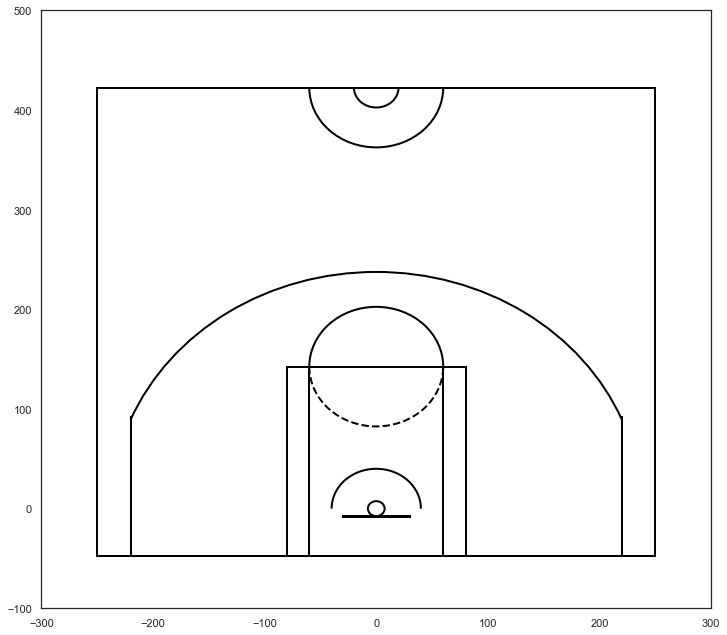

In [9]:
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

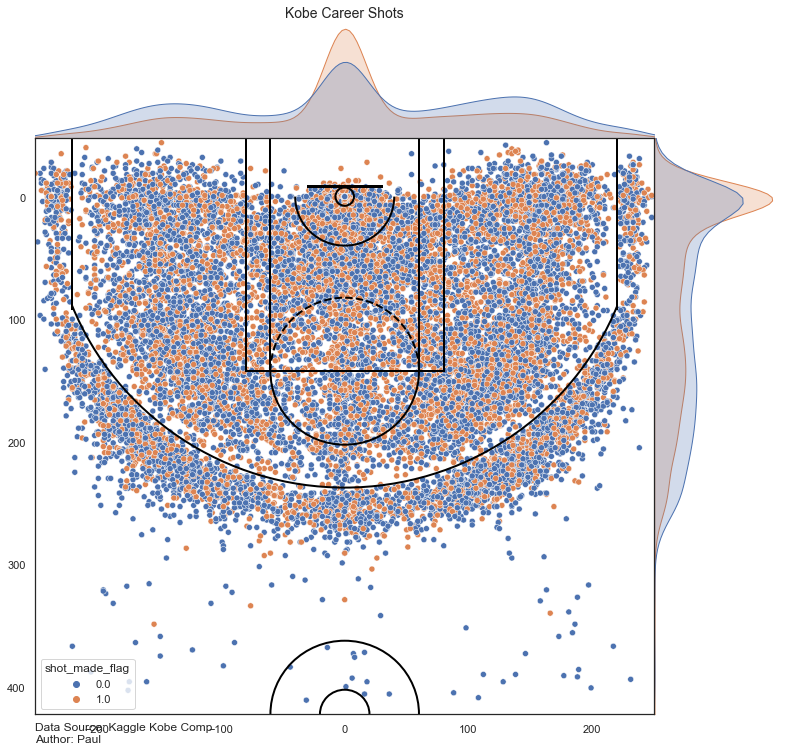

In [10]:
# create our jointplot

cmap=plt.cm.gist_heat_r
joint_shot_chart = sns.jointplot(data=df_train, x="loc_x", y="loc_y", hue="shot_made_flag",
                                 space=0, color=cmap(.2), cmap=cmap)

joint_shot_chart.fig.set_size_inches(12,11)

# A joint plot has 3 Axes, the first one called ax_joint 
# is the one we want to draw our court onto 
ax = joint_shot_chart.ax_joint
draw_court(ax)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

# Add a title
ax.set_title('Kobe Career Shots', y=1.2, fontsize=14)

# Add Data Source and Author
ax.text(-250,445,'Data Source: Kaggle Kobe Comp'
        '\nAuthor: Paul', fontsize=12)

plt.show()


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Could not interpret value `shot_made_flag` for parameter `hue`

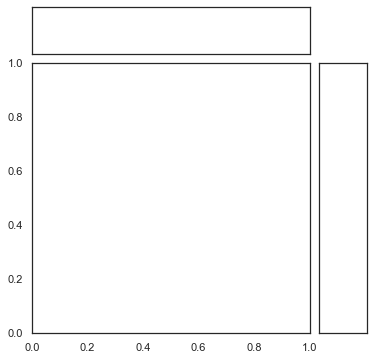

In [12]:
# create our jointplot
joint_shot_chart = sns.jointplot(df_train.loc_x, df_train.loc_y,
                                 kind='scatter',
                                 hue='shot_made_flag', space=0, alpha=0.5)

joint_shot_chart.fig.set_size_inches(12,11)

# A joint plot has 3 Axes, the first one called ax_joint 
# is the one we want to draw our court onto and adjust some other settings
ax = joint_shot_chart.ax_joint
draw_court(ax)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

# Add a title
ax.set_title('Kobe Bryant FGA \nCareer', 
             y=1.2, fontsize=18)

# Add Data Scource and Author
ax.text(-250,445,'Data Source: Kobe Kaggle Competition'
        '\nAuthor: Paul',
        fontsize=12)

plt.show()

In [11]:
df_train.groupby(['shot_zone_basic'])['game_id'].count().reset_index()

,shot_zone_basic,game_id
0,Above the Break 3,3817
1,Backcourt,49
2,In The Paint (Non-RA),3121
3,Left Corner 3,196
4,Mid-Range,8411
5,Restricted Area,4696
6,Right Corner 3,267


In [ ]:
df_train.columns

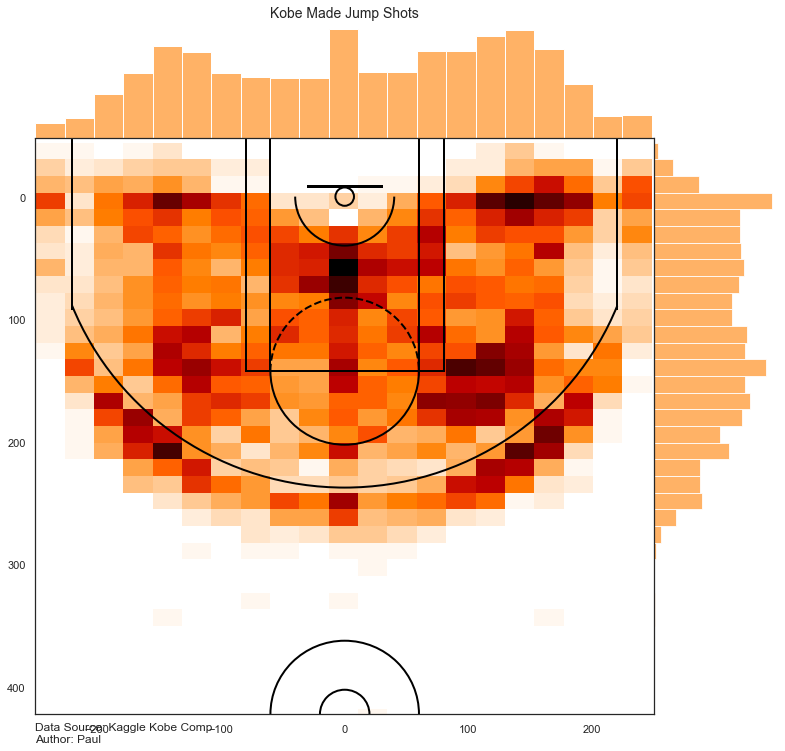

In [12]:
# create our jointplot

cmap=plt.cm.gist_heat_r
joint_shot_chart = sns.jointplot(data=df_train[(df_train['shot_made_flag']==1) &
                                               (df_train['combined_shot_type']=='Jump Shot')
                                              ], 
                                 x="loc_x", y="loc_y", kind="hist",
                                 space=0, color=cmap(.2), cmap=cmap)

joint_shot_chart.fig.set_size_inches(12,11)

# A joint plot has 3 Axes, the first one called ax_joint 
# is the one we want to draw our court onto 
ax = joint_shot_chart.ax_joint
draw_court(ax)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

# Add a title
ax.set_title('Kobe Made Jump Shots', y=1.2, fontsize=14)

# Add Data Source and Author
ax.text(-250,445,'Data Source: Kaggle Kobe Comp'
        '\nAuthor: Paul', fontsize=12)

plt.show()


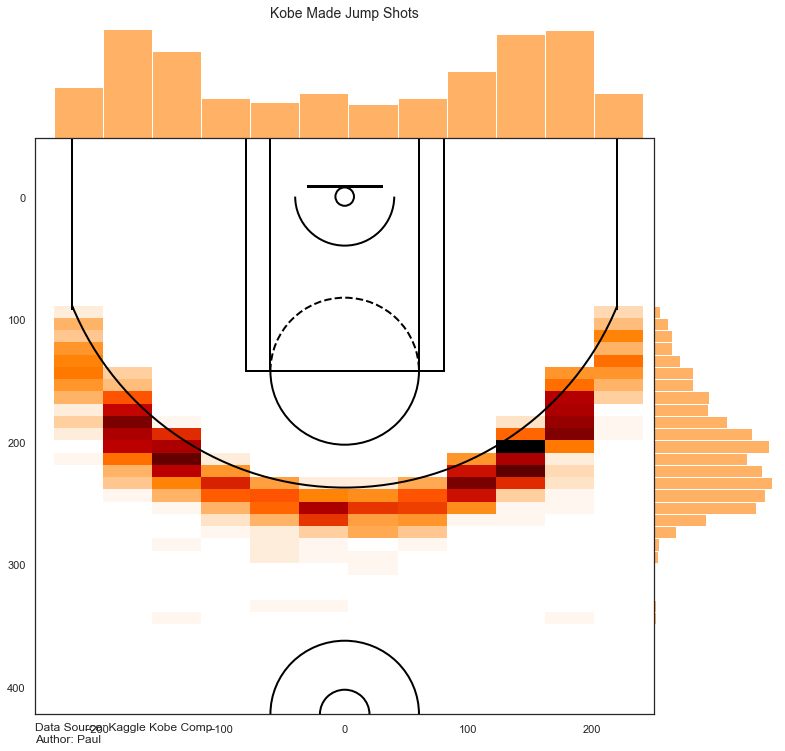

In [13]:
# create our jointplot

cmap=plt.cm.gist_heat_r
joint_shot_chart = sns.jointplot(data=df_train[(df_train['shot_made_flag']==1) &
                                               (df_train['shot_zone_basic']=='Above the Break 3')
                                              ], 
                                 x="loc_x", y="loc_y", kind="hist",
                                 space=0, color=cmap(.2), cmap=cmap)

joint_shot_chart.fig.set_size_inches(12,11)

# A joint plot has 3 Axes, the first one called ax_joint 
# is the one we want to draw our court onto 
ax = joint_shot_chart.ax_joint
draw_court(ax)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

# Add a title
ax.set_title('Kobe Made Jump Shots', y=1.2, fontsize=14)

# Add Data Source and Author
ax.text(-250,445,'Data Source: Kaggle Kobe Comp'
        '\nAuthor: Paul', fontsize=12)

plt.show()


In [30]:
loc_x_bin= [-251, -200, -150, -100, -50, 0,
            50, 100, 150, 200, 251
           ]
loc_x_bin_labels = [-250, -200, -150, -100, -50, 0,
            50, 100, 150, 200
            ]

loc_y_bin= [-50, 0, 50, 100, 150, 
            200, 250, 300, 350,
            400, 450, 500, 550,
            800
           ]
loc_y_bin_labels = [-50, 0, 50, 100, 150, 
            200, 250, 300, 350,
            400, 450, 500, 550,
           ]

In [32]:
# Loc_x, and loc_y binning
df_train['loc_x_cut'] = pd.cut(df_train['loc_x'], loc_x_bin, labels = loc_x_bin_labels)
df_train['loc_y_cut'] = pd.cut(df_train['loc_y'], loc_y_bin ,labels = loc_y_bin_labels)
df_train['loc_bin'] = df_train['loc_x_cut'].astype(str) + "_"+ df_train['loc_y_cut'].astype(str)



In [36]:
df_train.to_csv("a.csv")